Jonathon Nguyen

ID: 801093003

Homework 1


In [1]:
import torch
import imageio
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

<b>Problem One<b>

In [2]:
# Load all the images. 
# When loading the images, the stride was using negative number. So I used np.ascontiguousarray() to fix that.
redBagImage = np.ascontiguousarray(imageio.imread("Images/RedCoughDropBag.jpg"))
blueSlidesImage = np.ascontiguousarray(imageio.imread("Images/BlueSlides.jpg"))
greenBagImage = np.ascontiguousarray(imageio.imread("Images/GreenFoodLionBag.jpg"))
blueBoxImage = np.ascontiguousarray(imageio.imread("Images/BlueMask.jpg"))
greenBookImage = np.ascontiguousarray(imageio.imread("Images/GreenTextbook.jpg"))

# Convert the images to a tensors.
redBagImage = torch.from_numpy(redBagImage)
blueSlidesImage = torch.from_numpy(blueSlidesImage)
greenBagImage = torch.from_numpy(greenBagImage)
blueBoxImage = torch.from_numpy(blueBoxImage)
greenBookImage = torch.from_numpy(greenBookImage)

In [3]:
# Converted the Data type to float in order to take the mean.
redBagImage = redBagImage.float()
blueSlidesImage = blueSlidesImage.float()
greenBagImage = greenBagImage.float()
blueBoxImage = blueBoxImage.float()
greenBookImage = greenBookImage.float()

# Find the mean of the image to find the brightness.
redBagMean = redBagImage.mean()
blueSlidesMean = blueSlidesImage.mean()
greenBagMean = greenBagImage.mean()
blueBoxMean = blueBoxImage.mean()
greenBookMean = greenBookImage.mean()

# Print out the data.
print(f"Red Cough Drop Bag Image Mean: {redBagMean}")
print(f"Blue Slides Image Mean: {blueSlidesMean}")
print(f"Green Food Lion Bag Image Mean: {greenBagMean}")
print(f"Blue Mask Box Image Mean: {blueBoxMean}")
print(f"Green Textbook Image Mean: {greenBookMean}")

Red Cough Drop Bag Image Mean: 128.5584716796875
Blue Slides Image Mean: 120.75616455078125
Green Food Lion Bag Image Mean: 107.5559310913086
Blue Mask Box Image Mean: 116.16466522216797
Green Textbook Image Mean: 117.69389343261719


In [4]:
# Find the mean for each color channel.
print("Red Cough Drop Bag Image\n")
print(f"Red Channel Tensor Average: {redBagImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {redBagImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {redBagImage[:, :, 2].mean()}")

Red Cough Drop Bag Image

Red Channel Tensor Average: 175.42739868164062
Green Channel Tensor Average: 116.5374755859375
Blue Channel Tensor Average: 93.48994445800781


In [5]:
# Find the mean for each color channel.
print("Blue Slides Image\n")
print(f"Red Channel Tensor Average: {blueSlidesImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {blueSlidesImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {blueSlidesImage[:, :, 2].mean()}")

Blue Slides Image

Red Channel Tensor Average: 116.03614807128906
Green Channel Tensor Average: 117.88151550292969
Blue Channel Tensor Average: 128.31166076660156


In [6]:
# Find the mean for each color channel.
print("Green Food Lion Bag\n")
print(f"Red Channel Tensor Average: {greenBagImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {greenBagImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {greenBagImage[:, :, 2].mean()}")

Green Food Lion Bag

Red Channel Tensor Average: 108.66057586669922
Green Channel Tensor Average: 120.62203979492188
Blue Channel Tensor Average: 93.41419982910156


In [7]:
# Find the mean for each color channel.
print("Blue Mask Box Image\n")
print(f"Red Channel Tensor Average: {blueBoxImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {blueBoxImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {blueBoxImage[:, :, 2].mean()}")

Blue Mask Box Image

Red Channel Tensor Average: 97.59624481201172
Green Channel Tensor Average: 119.44755554199219
Blue Channel Tensor Average: 131.1785125732422


In [8]:
# Find the mean for each color channel.
print("Green Textbook Image\n")
print(f"Red Channel Tensor Average: {greenBookImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {greenBookImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {greenBookImage[:, :, 2].mean()}")

Green Textbook Image

Red Channel Tensor Average: 121.12944793701172
Green Channel Tensor Average: 137.35079956054688
Blue Channel Tensor Average: 94.44293975830078


<b>Problem Two<b>

In [9]:
# Define the non-linear model
def model(t_u, w2, w1, b):
    return w2* t_u ** 2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [10]:
def training_loop(epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, epochs + 1):
        w2, w1, b = params
        
        if params.grad is not None:
            params.grad.zero_()
        
        # Pass the input vars and parms into the model
        # Find the loss and back progragate.
        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        # Every 500 epoch, it will print the loss.
        if (epoch % 500 == 0):
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return params

In [11]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Convert the list into tensors.
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# normalize the input.
t_u_normalize = 0.1 * t_u

# Set it to loop for 5000.
NUM_EPOCHS = 5000

In [12]:
# Call the training loop with a learning rate of .1
LEARNING_RATE = 0.1
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, t_u_normalize, t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [13]:
# Call the training loop with a learning rate of .01
LEARNING_RATE = 0.01
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, t_u_normalize, t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [14]:
# Call the training loop with a learning rate of .001
LEARNING_RATE = 0.001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, t_u_normalize, t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [15]:
# Call the training loop with a learning rate of .0001
LEARNING_RATE = 0.0001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
params_new = training_loop(NUM_EPOCHS, LEARNING_RATE, params, t_u_normalize, t_c)
params_new

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642084
Epoch 1500, Loss 7.171004
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845287
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000801
Epoch 5000, Loss 3.861745


tensor([ 0.5570, -0.8881, -0.8753], requires_grad=True)

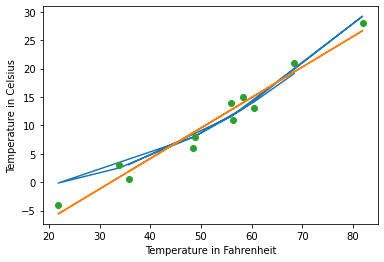

In [16]:
# Defined the linear model so I can plot the predicted linear values.
def linear_model(t_u, w, b):
    return t_u*w + b

# Pass the best params with the normalize model.
t_p = model(t_u_normalize, *params_new)

# I got the params from the lecture slides
linear_params = torch.tensor([5.3671, -17.3012])
t_p_linear = linear_model(t_u_normalize, *linear_params)

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Temperature in Fahrenheit")
plt.ylabel("Temperature in Celsius")

# Plot the model and the actual values.
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_p_linear.numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

<b>Problem Three<b>

In [17]:
# A model using 6 input vars and params.
def model(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return w5*x5 + w4*x4 + w3*x3 + w2*x2 + w1*x1 + b

# Squared difference error loss function.
def loss_fn(prices_p, prices):
    squared_diffs = (prices_p - prices) ** 2
    return squared_diffs.mean()

In [18]:
def training_loop(epochs, learning_rate, params, input_vars, prices):
    for epoch in range(1, epochs + 1):
        
        if params.grad is not None:
            params.grad.zero_()
        
        prices_p = model(*input_vars, *params)
        loss = loss_fn(prices_p, prices)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if (epoch % 500 == 0):
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return params

In [19]:
NUM_EPOCHS = 5000

# Read the data from the provided CSV files
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

# split the data into the input vars and the prices.
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
prices = housing['price']

# Turn input, prices and params into a tensor
input_vars = []
for col in num_vars:
     # Packing the tensor into a list to pass as a param
    tensor = torch.tensor(housing[col]).float()
    mean = torch.mean(tensor)
    std = torch.std(tensor)
    input_vars.append((tensor - mean) / std)

prices = torch.tensor(prices.values).float()
mean = torch.mean(prices)
std = torch.std(prices)
prices = (prices - mean) / std

In [20]:
# Call the training loop with a learning rate of .1
LEARNING_RATE = 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices)

Epoch 500, Loss 0.437613
Epoch 1000, Loss 0.437613
Epoch 1500, Loss 0.437613
Epoch 2000, Loss 0.437613
Epoch 2500, Loss 0.437613
Epoch 3000, Loss 0.437613
Epoch 3500, Loss 0.437613
Epoch 4000, Loss 0.437613
Epoch 4500, Loss 0.437613
Epoch 5000, Loss 0.437613


tensor([ 3.8417e-01,  6.6217e-02,  3.0456e-01,  2.5413e-01,  1.7393e-01,
        -8.9192e-08], requires_grad=True)

In [21]:
# Call the training loop with a learning rate of .01
LEARNING_RATE = 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
params_new = training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices)

Epoch 500, Loss 0.437613
Epoch 1000, Loss 0.437613
Epoch 1500, Loss 0.437613
Epoch 2000, Loss 0.437613
Epoch 2500, Loss 0.437613
Epoch 3000, Loss 0.437613
Epoch 3500, Loss 0.437613
Epoch 4000, Loss 0.437613
Epoch 4500, Loss 0.437613
Epoch 5000, Loss 0.437613


In [22]:
# Call the training loop with a learning rate of .001
LEARNING_RATE = 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices)

Epoch 500, Loss 0.571184
Epoch 1000, Loss 0.443695
Epoch 1500, Loss 0.438594
Epoch 2000, Loss 0.437866
Epoch 2500, Loss 0.437682
Epoch 3000, Loss 0.437632
Epoch 3500, Loss 0.437618
Epoch 4000, Loss 0.437614
Epoch 4500, Loss 0.437613
Epoch 5000, Loss 0.437613


tensor([ 3.8400e-01,  6.6427e-02,  3.0432e-01,  2.5415e-01,  1.7415e-01,
        -8.3366e-08], requires_grad=True)

In [23]:
# Call the training loop with a learning rate of .0001
LEARNING_RATE = 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices)

Epoch 500, Loss 4.270935
Epoch 1000, Loss 3.057837
Epoch 1500, Loss 2.230426
Epoch 2000, Loss 1.665829
Epoch 2500, Loss 1.280357
Epoch 3000, Loss 1.016998
Epoch 3500, Loss 0.836914
Epoch 4000, Loss 0.713641
Epoch 4500, Loss 0.629144
Epoch 5000, Loss 0.571129


tensor([4.5009e-01, 2.3335e-01, 3.4422e-01, 3.6517e-01, 3.6498e-01, 1.3991e-08],
       requires_grad=True)

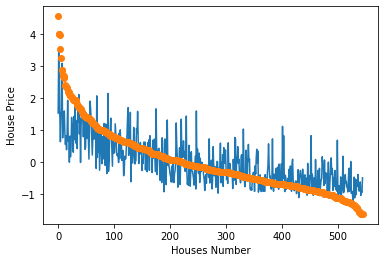

In [24]:
# Find the predicted prices
prices_p = model(*input_vars, *params_new)

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Houses Number")
plt.ylabel("House Price")

# Plot the model and the actual values.
plt.plot(prices_p.detach().numpy())
plt.plot(prices.numpy(), 'o')